# Imports

In [ ]:
pip install pygam

     |████████████████████████████████| 1.8 MB 4.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from pygam import LinearGAM, s, f

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load data

Data can be found at this adress : https://www.kaggle.com/mirichoi0218/insurance

In [ ]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Preprocessing

In [ ]:
insurance['sex'] = insurance['sex'].replace("female",0)
insurance['sex'] = insurance['sex'].replace("male",1)

In [ ]:
insurance['smoker'] = insurance['smoker'].replace("no",0)
insurance['smoker'] = insurance['smoker'].replace("yes",1)

In [ ]:
insurance['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
dummies = pd.get_dummies(insurance['region'])

In [ ]:
dummies = pd.get_dummies(insurance['region'])
insurance = insurance.join(dummies)
insurance=insurance.drop(columns=['region', 'northeast'])
insurance.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# Data exploration

In [ ]:
insurance.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest,lcharges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242900,0.272048,0.242900,9.098659
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995,0.919527
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,7.022756
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,8.463853
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,9.146552
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,1.000000,0.000000,9.719558
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,11.063045


Text(0.5, 1.0, 'Charges by age')

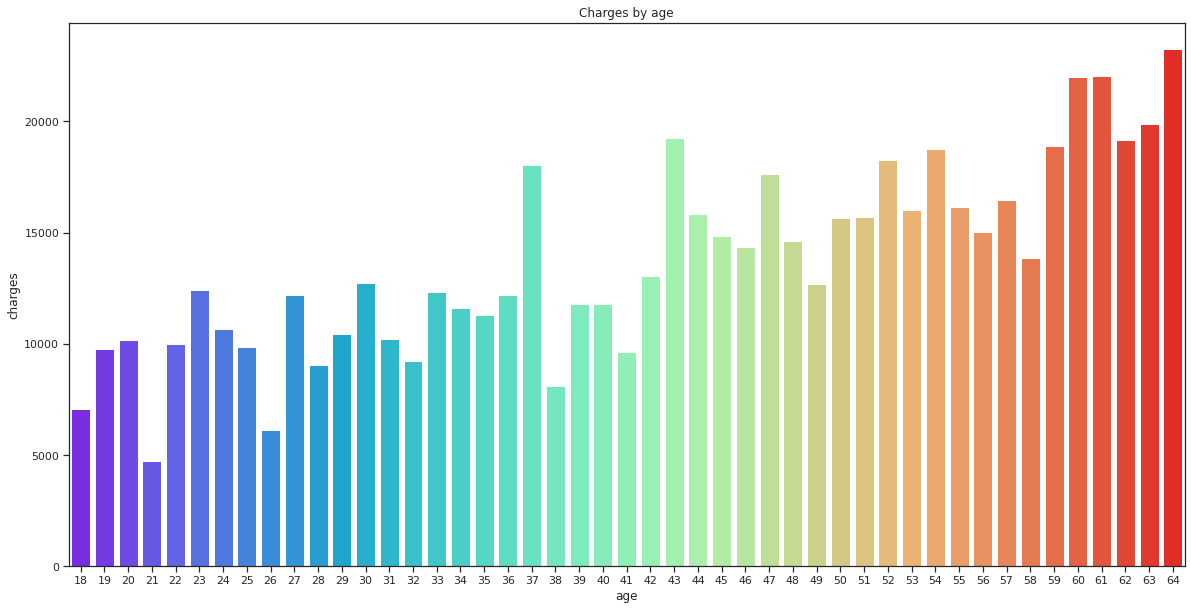

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x="age", y='charges', data=insurance, palette='rainbow', ci = None)
plt.title("Charges by age")

Text(0.5, 1.0, 'Charges by number of childrens')

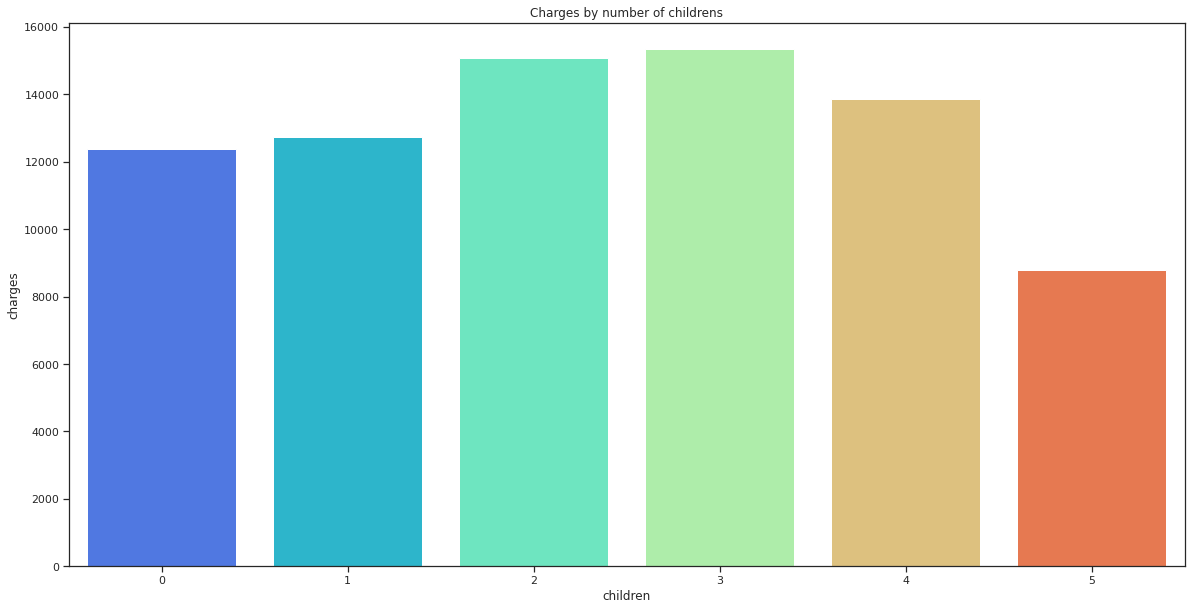

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x="children", y='charges', data=insurance, palette='rainbow', ci = None)
plt.title("Charges by number of childrens")

Text(0.5, 1.0, 'Charges by smoking or not')

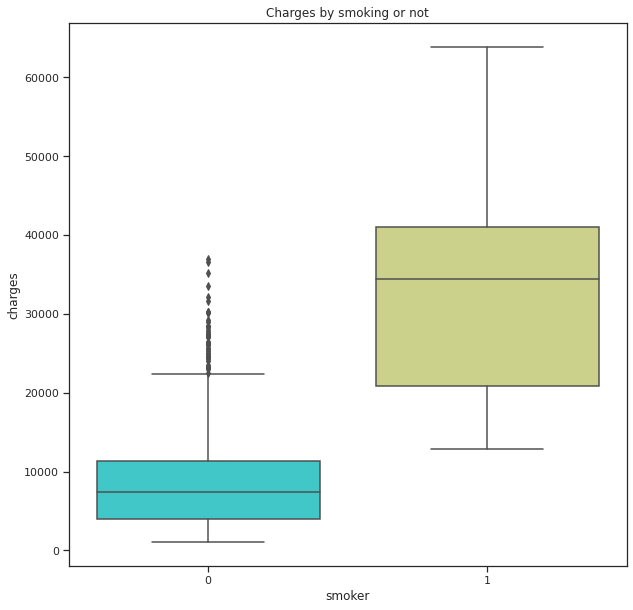

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="smoker", y='charges', data=insurance, palette='rainbow')
plt.title("Charges by smoking or not")

Text(0.5, 1.0, 'Charges by sex')

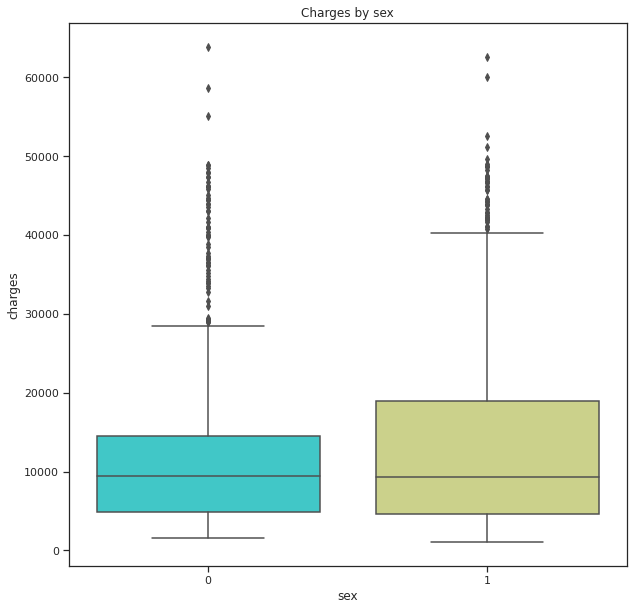

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="sex", y='charges', data=insurance, palette='rainbow')
plt.title("Charges by sex")

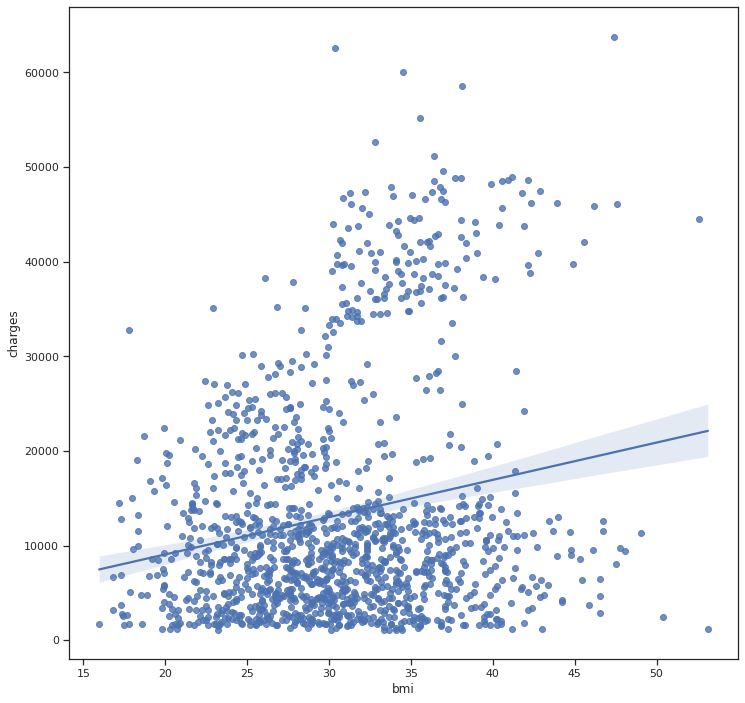

In [ ]:
plt.figure(figsize=(12,12))
sns.set(style="ticks", color_codes=True)
sns.regplot(x = insurance["bmi"], y = insurance["charges"])
plt.show()

## Density visualisation

### Right-skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


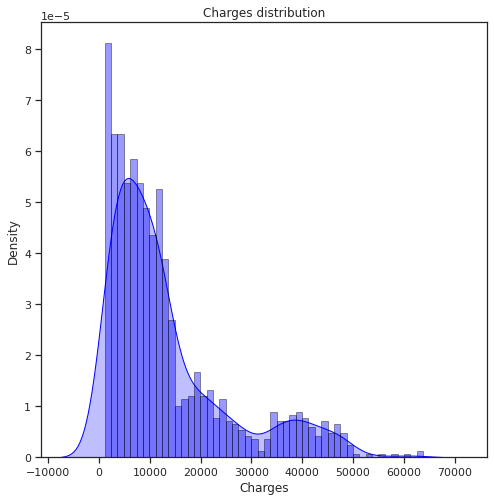

In [ ]:
plt.figure(figsize=(8,8))
sns.set(style="ticks", color_codes=True)
sns.distplot(insurance['charges'], hist=True, kde=True, kde_kws = {'shade': True, 'linewidth' : 1},
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Charges distribution')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.savefig("density_1.png")

### Normal distribution

In [ ]:
insurance['lcharges'] = np.log(insurance['charges'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


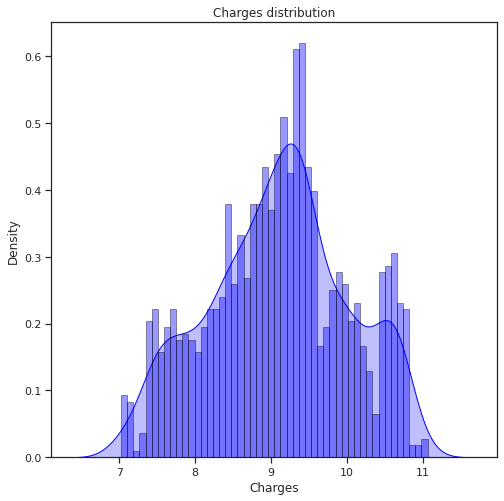

In [ ]:
plt.figure(figsize=(8,8))
sns.set(style="ticks", color_codes=True)
sns.distplot(insurance['lcharges'], hist=True, kde=True, kde_kws = {'shade': True, 'linewidth' : 1},
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Charges distribution')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.savefig("density_2.png")

#  Estimation by OLS

In [ ]:
X = insurance.drop(columns = ['charges','lcharges'])
X = sm.add_constant(X)
y_l = insurance['lcharges']
y = insurance['charges']


In [ ]:
mod = sm.OLS(y_l, X)
res1 = mod.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lcharges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:47:15   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0306      0.072     97.112      0.000       6.889       7.173
age            0.0346      0.001     39.655      0.000       0.033       0.036
sex           -0.0754      0.024     -3.091      0.002      -0.123      -0.028
bmi            0.0134      0.002      6.381      0.000       0.009       0.017
children       0.1019      0.010     10.085      0.000       0.082       0.122
smoker         1.5543      0.030     51.333      0.000       1.495       1.614
northwest     -0.0638      0.035     -1.827      0.068      -0.132       0.005
southeast     -0.1572      0.035     -4.481      0.000      -0.226      -0.088
southwest     -0.1290      0.035     -3.681      0.000      -0.198      -0.060
==============================================================================
Omnibus:                      463.882   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1673.760
Skew:                           1.679   Prob(JB):                         0.00
Kurtosis:                       7.330   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pd.options.display.float_format = "{:.4f}".format
res1.resid.describe()

count   1338.0000
mean      -0.0000
std        0.4430
min       -1.0719
25%       -0.1983
50%       -0.0492
75%        0.0660
max        2.1664
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


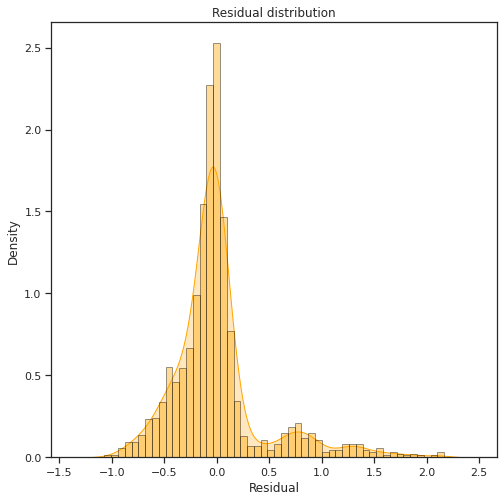

In [ ]:
plt.figure(figsize=(8,8))
sns.set(style="ticks", color_codes=True)
sns.distplot(res1.resid, hist=True, kde=True, kde_kws = {'shade': True, 'linewidth' : 1},
             bins=50, color = 'orange',
             hist_kws={'edgecolor':'black'})
plt.title('Residual distribution')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.savefig("residual.png")

# GAM : identify non-linear relation

In [ ]:
X_gam=insurance[['bmi','age','smoker','sex','children']]

In [ ]:
n_features = 5 # number of features used in the model
lams = np.logspace(-5,5,20)
splines = 12 # number of splines we will use

end = X_gam.shape[0]-2

In [ ]:
gam = LinearGAM(s(0) + s(1) + f(2)+ f(3) + f(4)).gridsearch(X_gam.iloc[:end].values,
                                                   y_l.iloc[:end].values,
                                                  lam=lams)
gam.summary()

100% (20 of 20) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     20.8598
Link Function:                     IdentityLink Log Likelihood:                                 -2389.9602
Number of Samples:                         1336 AIC:                                               4823.64
                                                AICc:                                             4824.401
                                                GCV:                                                0.2032
                                                Scale:                                              0.1975
                                                Pseudo R-Squared:                                   0.7695
Feature Function                  Lam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  after removing the cwd from sys.path.


In [ ]:
print(X_gam.columns)
print(gam.terms)

Index(['bmi', 'age', 'smoker', 'sex', 'children'], dtype='object')
s(0) + s(1) + f(2) + f(3) + f(4) + intercept


There is non linearity if the H0 hypotheses is rejected with :

H0 : linear

H1 : non-linear

Moreover, if the EDF is 1, there is linearity and the larger is the EDF the more wiggly (not linear) the fitted model is.

Thus, the sex and the smoker variables have a linear relation with the log of charges. BMI,AGE and CHILDREN have a non linear relationship with the log of charges.

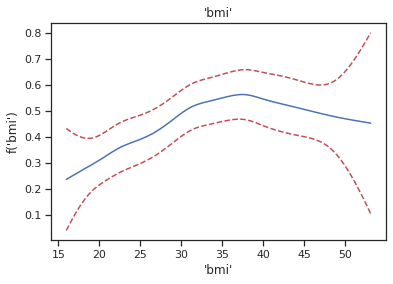

<Figure size 432x288 with 0 Axes>

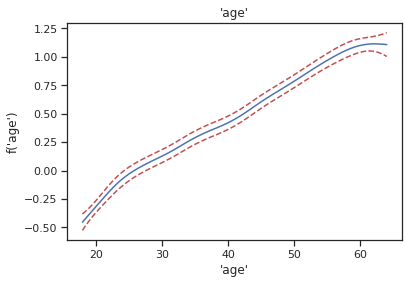

<Figure size 432x288 with 0 Axes>

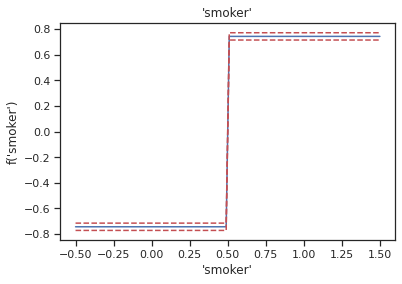

<Figure size 432x288 with 0 Axes>

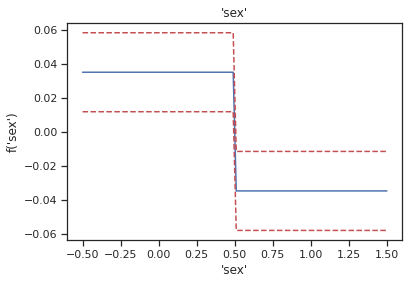

<Figure size 432x288 with 0 Axes>

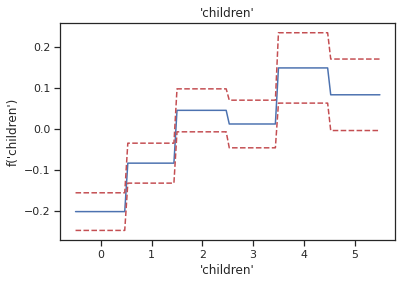

<Figure size 432x288 with 0 Axes>

In [ ]:
titles = ['bmi','age','smoker','sex','children']
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    
    plt.title(repr(titles[i]));
    plt.ylabel(repr(f(titles[i])));
    plt.xlabel(repr(titles[i]));
    plt.savefig('GAM'+str(i)+'.png')
    plt.show()
    plt.clf()

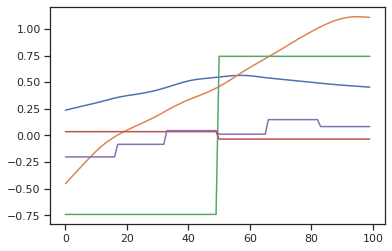

In [ ]:
plt.figure()
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.plot(gam.partial_dependence(term=i))

### Region analyse

In [ ]:
X_reg=insurance[['northwest','southwest','southeast']]

In [ ]:
n_features = 3 # number of features used in the model
lams = np.logspace(-5,5,20)
splines = 12 # number of splines we will use

end = X_reg.shape[0]-2

In [ ]:
gam = LinearGAM(f(0) + f(1) + f(2)).gridsearch(X_reg.iloc[:end].values,
                                                   y_l.iloc[:end].values,
                                                  lam=lams)
gam.summary()

100% (20 of 20) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                       1.015
Link Function:                     IdentityLink Log Likelihood:                                 -1792.0266
Number of Samples:                         1336 AIC:                                             3588.0832
                                                AICc:                                            3588.0924
                                                GCV:                                                0.8452
                                                Scale:                                              0.8441
                                                Pseudo R-Squared:                                      0.0
Feature Function                  Lam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  after removing the cwd from sys.path.


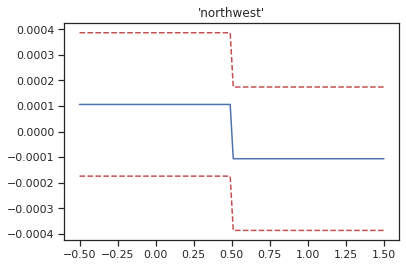

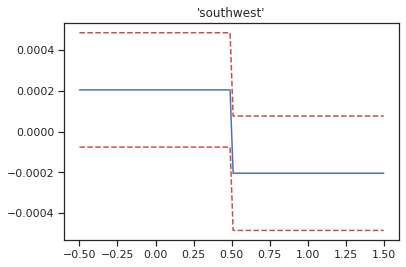

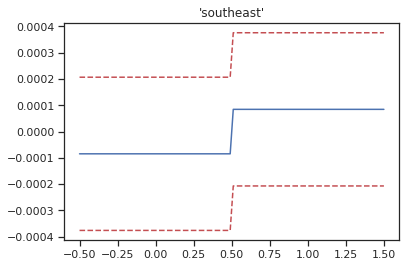

In [ ]:
titles = ['northwest','southwest','southeast']
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    
    plt.title(repr(titles[i]));
    plt.show()

# Parametric estimation using relation from GAM

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest,lcharges
0,19,0,27.9000,0,1,16884.9240,0,0,1,9.7342
1,18,1,33.7700,1,0,1725.5523,0,1,0,7.4533
2,28,1,33.0000,3,0,4449.4620,0,1,0,8.4005
3,33,1,22.7050,0,0,21984.4706,1,0,0,9.9981
4,32,1,28.8800,0,0,3866.8552,1,0,0,8.2602


In [ ]:
insurance_q3=insurance
insurance_q3['lbmi'] =  np.log(insurance_q3['bmi'])
insurance_q3['sage'] =  np.sin(insurance_q3['age'])
insurance_q3['schildren'] =  np.sin(insurance_q3['children'])
insurance_q3['lchildren'] =  np.log(1 + insurance_q3['children'])
insurance_q3.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest,lcharges,lbmi,sage,schildren,lchildren
0,19,0,27.9000,0,1,16884.9240,0,0,1,9.7342,3.3286,0.1499,0.0000,0.0000
1,18,1,33.7700,1,0,1725.5523,0,1,0,7.4533,3.5196,-0.7510,0.8415,0.6931
2,28,1,33.0000,3,0,4449.4620,0,1,0,8.4005,3.4965,0.2709,0.1411,1.3863
3,33,1,22.7050,0,0,21984.4706,1,0,0,9.9981,3.1226,0.9999,0.0000,0.0000
4,32,1,28.8800,0,0,3866.8552,1,0,0,8.2602,3.3631,0.5514,0.0000,0.0000


In [ ]:
X = insurance_q3.drop(columns = ['charges','lcharges','bmi','age', 'schildren', 'children'])
X = sm.add_constant(X)
y_l = insurance_q3['lcharges']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


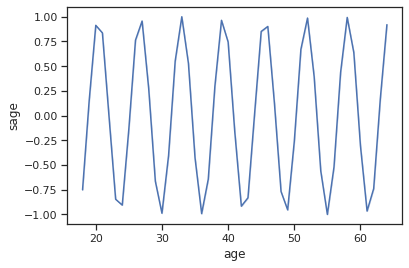

In [ ]:
sns.lineplot(insurance_q3['age'], insurance_q3['sage'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


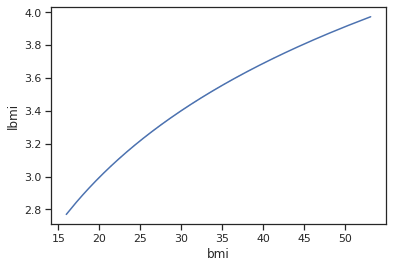

In [ ]:
sns.lineplot(insurance_q3['bmi'], insurance_q3['lbmi'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


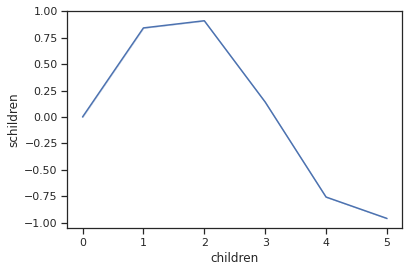

In [ ]:
sns.lineplot(insurance_q3['children'], insurance_q3['schildren'])

In [ ]:
mod_2 = sm.OLS(y_l, X)
res2 = mod_2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lcharges   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     164.6
Date:                Fri, 15 Oct 2021   Prob (F-statistic):          1.16e-192
Time:                        16:49:54   Log-Likelihood:                -1325.1
No. Observations:                1338   AIC:                             2668.
Df Residuals:                    1329   BIC:                             2715.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3238      0.310     20.370      0.000       5.715       6.933
sex           -0.0999      0.036     -2.785      0.005      -0.170      -0.030
smoker         1.5285      0.045     34.303      0.000       1.441       1.616
northwest     -0.0775      0.051     -1.508      0.132      -0.178       0.023
southeast     -0.2122      0.052     -4.120      0.000      -0.313      -0.111
southwest     -0.1437      0.052     -2.784      0.005      -0.245      -0.042
lbmi           0.7258      0.092      7.894      0.000       0.545       0.906
sage           0.0162      0.026      0.631      0.528      -0.034       0.067
lchildren      0.2650      0.032      8.260      0.000       0.202       0.328
==============================================================================
Omnibus:                        6.482   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                5.173
Skew:                          -0.050   Prob(JB):                       0.0753
Kurtosis:                       2.712   Cond. No.                         66.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Normal

count    1.338000e+03
mean    -7.858852e-15
std      6.529936e-01
min     -1.849852e+00
25%     -4.474370e-01
50%      5.215611e-02
75%      4.413127e-01
max      1.777008e+00
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

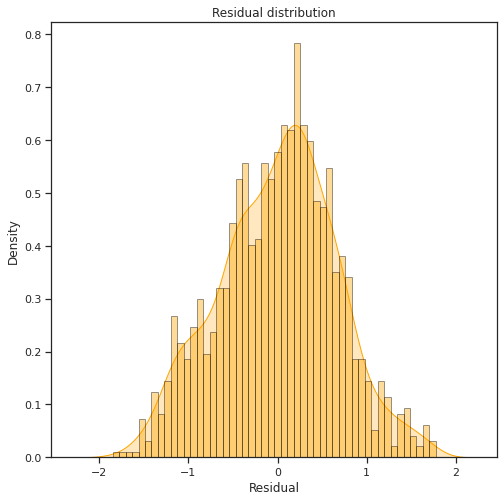

In [ ]:
print(res2.resid.describe())
plt.figure(figsize=(8,8))
sns.set(style="ticks", color_codes=True)
sns.distplot(res2.resid, hist=True, kde=True, kde_kws = {'shade': True, 'linewidth' : 1},
             bins=50, color = 'orange',
             hist_kws={'edgecolor':'black'})
plt.title('Residual distribution')
plt.xlabel('Residual')
plt.ylabel('Density')

Sinus

count    1.338000e+03
mean     1.753435e-13
std      6.657666e-01
min     -1.930979e+00
25%     -4.216939e-01
50%      9.323683e-02
75%      4.547486e-01
max      1.863743e+00
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

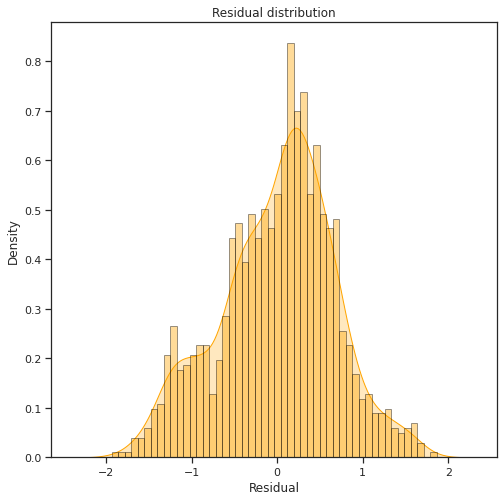

In [ ]:
print(res2.resid.describe())
plt.figure(figsize=(8,8))
sns.set(style="ticks", color_codes=True)
sns.distplot(res2.resid, hist=True, kde=True, kde_kws = {'shade': True, 'linewidth' : 1},
             bins=50, color = 'orange',
             hist_kws={'edgecolor':'black'})
plt.title('Residual distribution')
plt.xlabel('Residual')
plt.ylabel('Density')

Log

count   1338.0000
mean       0.0000
std        0.6517
min       -1.8236
25%       -0.4483
50%        0.0457
75%        0.4425
max        1.7508
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

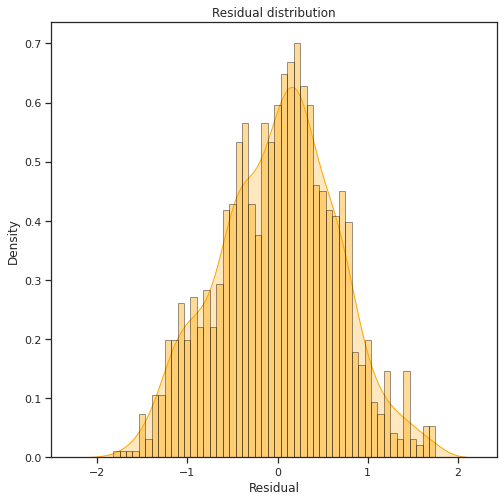

In [ ]:
pd.options.display.float_format = "{:.4f}".format
print(res2.resid.describe())
plt.figure(figsize=(8,8))
sns.set(style="ticks", color_codes=True)
sns.distplot(res2.resid, hist=True, kde=True, kde_kws = {'shade': True, 'linewidth' : 1},
             bins=50, color = 'orange',
             hist_kws={'edgecolor':'black'})
plt.title('Residual distribution')
plt.xlabel('Residual')
plt.ylabel('Density')


In [ ]:
X_gam=insurance_q3[['lbmi','sage','smoker','sex','lchildren']]

In [ ]:
n_features = 3 # number of features used in the model
lams = np.logspace(-5,5,20)
splines = 12 # number of splines we will use

end = X_gam.shape[0]-2

In [ ]:
gam = LinearGAM(s(0) + s(1)+s(2)+s(3)+s(4)).gridsearch(X_gam.iloc[:end].values,
                                                   y_l.iloc[:end].values,
                                                  lam=lams)
gam.summary()

100% (20 of 20) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     41.3906
Link Function:                     IdentityLink Log Likelihood:                                 -1680.0219
Number of Samples:                         1336 AIC:                                             3444.8249
                                                AICc:                                            3447.6709
                                                GCV:                                                0.3668
                                                Scale:                                              0.3464
                                                Pseudo R-Squared:                                   0.6021
Feature Function                  Lam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  after removing the cwd from sys.path.


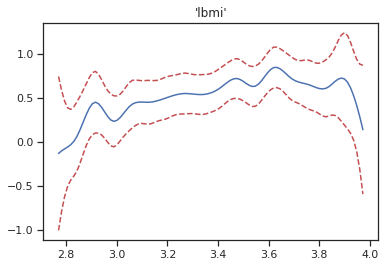

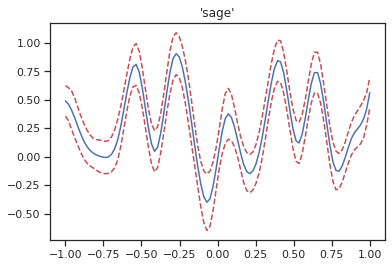

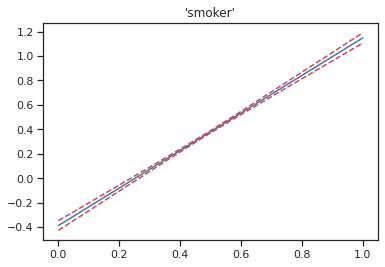

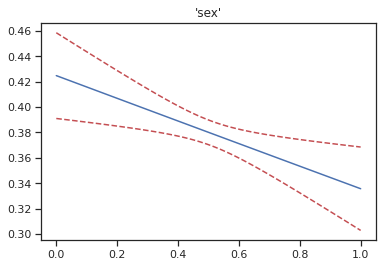

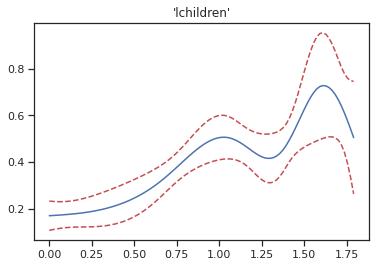

In [ ]:
titles = ['lbmi','sage','smoker','sex','lchildren']
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    
    plt.title(repr(titles[i]));
    plt.show()